In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST("",train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))

0it [00:00, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [4]:
test = datasets.MNIST("",train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [6]:
import torch.nn as nn

In [7]:
import torch.nn.functional as F

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax (x, dim=1)
        
        
        
net = Net()
print(net)
                    

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
X = torch.rand((28,28))
X = X.view(1,28*28)
output = net(X)

In [10]:
output

tensor([[-2.3955, -2.2846, -2.2082, -2.3329, -2.4814, -2.2066, -2.2597, -2.3405,
         -2.3302, -2.2209]], grad_fn=<LogSoftmaxBackward>)

In [14]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range (EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.0071, grad_fn=<NllLossBackward>)
tensor(0.0040, grad_fn=<NllLossBackward>)
tensor(0.2180, grad_fn=<NllLossBackward>)


In [31]:
correct = 0
total = 0
passes = 0

with torch.no_grad():
    for data in trainset:
        passes +=1
        X, y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate (output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total +=1
            
print("Accuracy", round(correct / total, 3))
print("pass", passes)

Accuracy 0.975
pass 6000


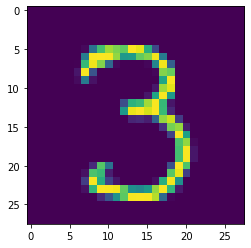

In [35]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show()

In [36]:
print(y[2])

tensor(3)


In [38]:
print(torch.argmax(net(X[2].view(-1,784))))

tensor(3)


In [26]:
print(data[1].shape)

torch.Size([10])


In [28]:
print(test)

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )
